In [28]:
import pandas as pd
import numpy as np

# Import Data
detailed_transactions_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/all_transactions_data.csv')
transactions = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_transactions_df.csv')
checkings = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_checkings_df.csv')
savings = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_savings_df.csv')
credit = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_credit_df.csv')

In [43]:
transactions.shape

(664, 19)

In [29]:
pd.set_option('display.max_columns', 63)
transactions.head(20)

,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt
0,1362480,1,15,20,1,25,0,1,2,12,23,12,13,32,26.182107,378.28,1254.83,1807.71,2185.99
1,1362484,1,38,30,0,0,0,3,13,15,15,12,10,50,18.816515,33.08,1847.77,302.31,335.39
2,1362485,7,50,16,0,23,0,0,1,0,19,12,13,30,5.223484,56.93,-1009.03,-981.91,-925.52
3,1362486,0,0,5,0,0,0,0,0,24,3,0,5,13,29.791667,57.20,3428.51,-1165.56,-1108.36
4,1362487,3,23,3,0,0,0,12,0,19,12,4,6,21,21.713894,51.12,-134.13,-3603.25,-3553.12
5,1362488,0,0,10,0,0,0,7,1,7,25,0,6,43,3.193878,19.63,162.42,-4132.15,-4112.52
6,1362489,0,24,16,1,22,0,6,1,18,17,9,10,32,26.083633,258.36,479.08,341.26,599.62
7,1362492,1,24,16,0,0,0,3,2,8,20,4,18,34,6.736054,69.54,-1417.18,-6550.77,-6481.68
8,1362496,0,0,0,0,0,0,0,0,12,0,0,0,0,30.363636,3.72,251.06,0.00,3.72
9,1362497,0,0,8,0,0,0,0,0,12,2,0,5,10,9.972222,4.27,10.86,-566.36,-562.09


In [57]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import Scaler
from sklearn.preprocessing import StandardScaler

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# import colour map
import matplotlib.cm as cm

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# Overall Transactions Cluster

#### Step 1: Extract Variables for Clustering

In [47]:
# Extract the variables for clustering
X = transactions.iloc[:, [15, 16, 17, 18]].values

#### Step 2: Normalize the variables to have zero mean and unit variance

In [48]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

#### Step 3: Choose the number of clusters you want to create (Create Elbow Plot)

In [61]:
sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)


#### Step 4: Create a plot of the SSE values vs. the number of clusters:

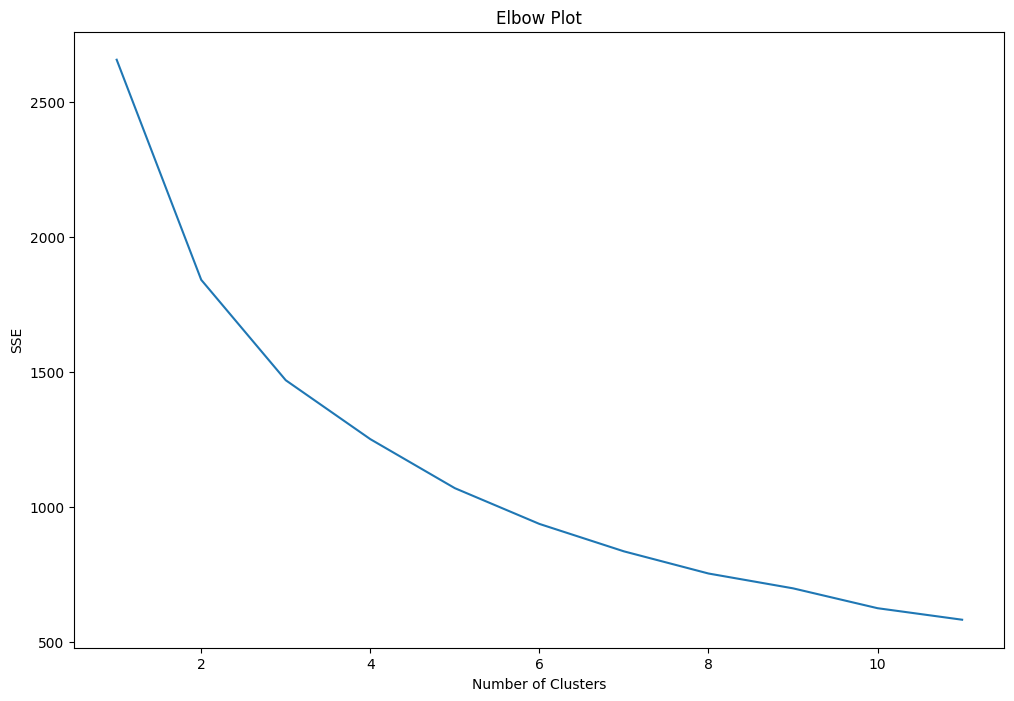

In [62]:
plt.plot(range(1, 12), sse)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [105]:
# Initialize the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# Fit the K-Means model to the dataset
kmeans.fit(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [106]:
# Predict the cluster labels for the dataset
y_kmeans = kmeans.predict(X)

#### Step 5: Visualise the clusters:

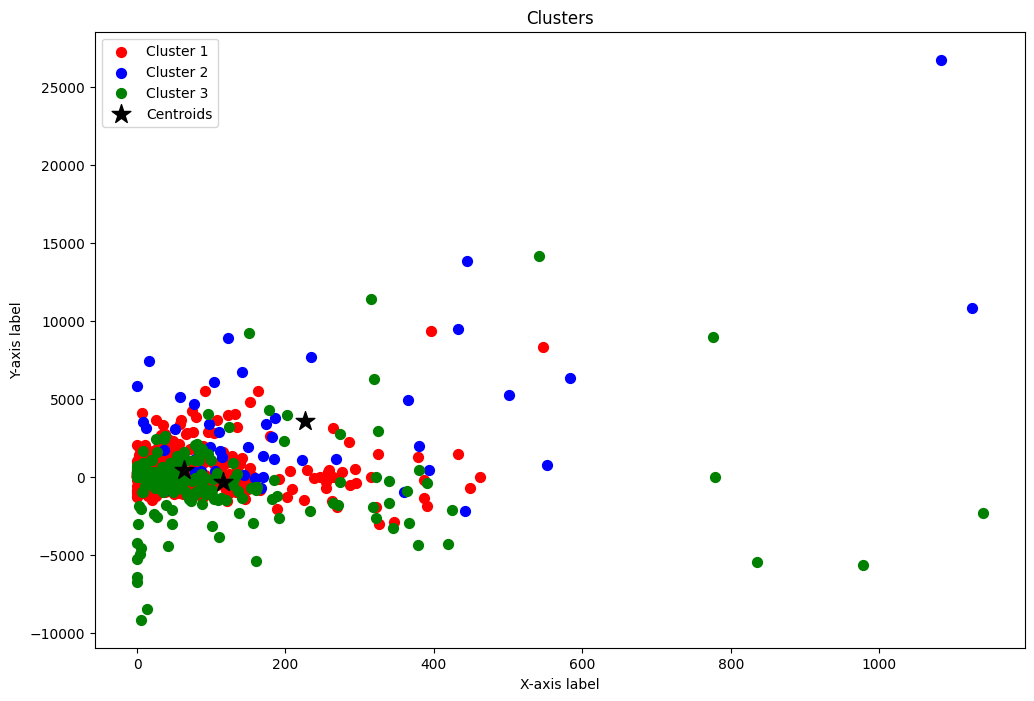

In [108]:
import matplotlib.pyplot as plt

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Get the coordinates of the centroids
centroids = kmeans.cluster_centers_

# Plot the data points with different colors based on their cluster assignments
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, c='green', label='Cluster 3')


# Plot the centroids as large markers
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='*', label='Centroids')

plt.title('Clusters')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.legend()
plt.show()


## Silhouette Analysis for Cluster

#### Step 1: Define the number of clusters you want to evaluate

In [98]:
k_range = range(2, 6)

#### Step 2: Iterate over the number of clusters and fit a KMeans model for each number

In [99]:
for n_clusters in k_range:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

#### Step 3: Calculate the silhouette score for each number of clusters

In [100]:
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)


For n_clusters = 5 The average silhouette_score is : 0.4110957512304449


## Step 4: Calculate the silhouette score for each sample and plot the results:

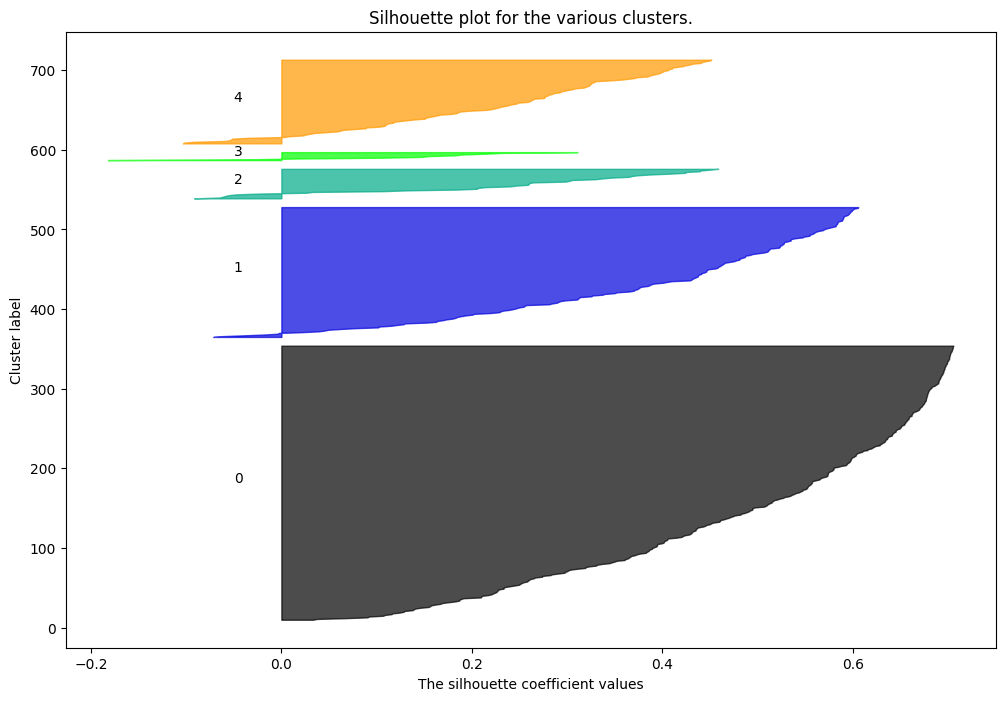

In [101]:
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10

plt.title("Silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()


## Britt Clusters
* Combine Principle, interest, new balance, and other like columns together for overall cluster
* Drop acc end date, drop Nan Rows, drop channels


## Stretch
##### See what the clusters look like when looking at demographics and transactions